In [1]:
import pandas as pd 

In [2]:
df_orig = pd.read_csv("car.data")
# Save copy of original data so we can see what the numbers mean by printing it out
df = df_orig.copy()

In [3]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
# Hypothesis: Car attributes can predict buying price. 
# This is a classification problem because the buying price is an ordered categorical variables.

# Wrangling
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
replacement_dict = {'vhigh' : 4, '5more' : 5 , 'v-high' : 4, 'high' : 3, 'med' : 2, 'low' : 1, 'small' : 1, 'low' : 1, 'big' : 3, '5-more' : 5, 'more' : 5}
for col in df.columns:
    df[col] = df[col].replace(replacement_dict)


class_replacement_dict = {'unacc':1, 'acc' : 2, 'good': 3, 'vgood' : 4}

df['class'] = df['class'].replace(class_replacement_dict)

In [7]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,2,1
1,4,4,2,2,1,3,1
2,4,4,2,2,2,1,1
3,4,4,2,2,2,2,1
4,4,4,2,2,2,3,1
...,...,...,...,...,...,...,...
1722,1,1,5,5,2,2,3
1723,1,1,5,5,2,3,4
1724,1,1,5,5,3,1,1
1725,1,1,5,5,3,2,3


In [8]:
# Train test split
from sklearn.model_selection import train_test_split

y = df.pop('class')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1412,1,3,2,4,1,1
756,3,1,2,2,1,2
589,3,3,3,5,2,3
906,2,4,3,4,3,2
1022,2,3,3,5,3,1
...,...,...,...,...,...,...
1130,2,2,3,5,3,1
1294,2,1,5,5,3,3
860,3,1,5,5,3,1
1459,1,3,4,2,1,3


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(steps=[("rf", RandomForestClassifier())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier())])

In [11]:
pipe.predict(X_test)

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 4, 2, 2, 1, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4,
       1, 1, 4, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 4, 2, 2, 1, 4, 2, 1, 4, 1, 2, 2,
       4, 1, 2, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 4, 1, 2, 1, 2, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4,
       2, 1, 1, 2, 4, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 4, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 3, 1, 1, 1, 3, 1, 2, 4, 2,
       1, 3, 4, 1, 3, 1, 1, 1, 2, 4, 1, 1, 1, 1, 2,

In [12]:
from yellowbrick.classifier import ConfusionMatrix

In [13]:
visualizer = ConfusionMatrix(pipe)

/home/bb/miniconda3/envs/gr/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9629629629629629

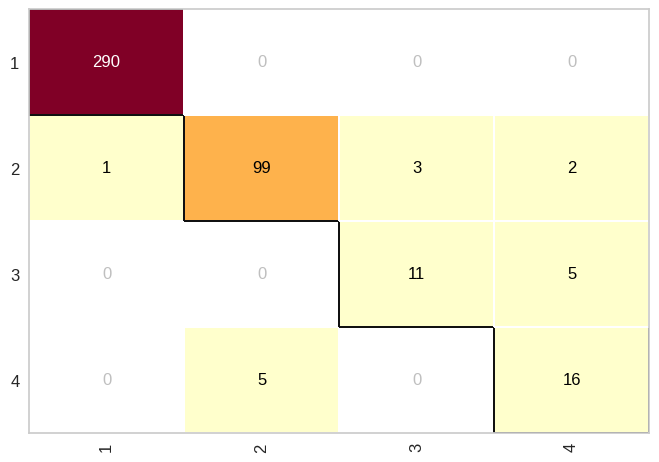

In [14]:
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)

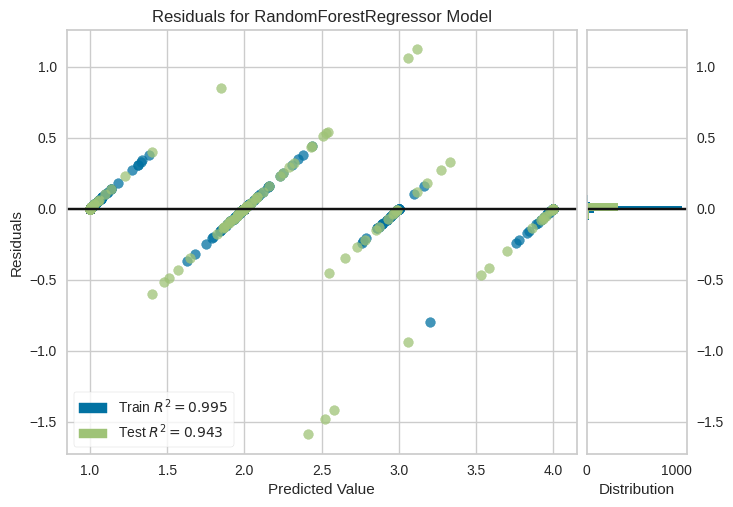

<AxesSubplot: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
# Model #2 
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot
pipe = Pipeline(steps=[("rf", RandomForestRegressor())])


visualizer = ResidualsPlot(pipe)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [17]:
# Conclusions 

# Using this dataset to predict buying price (Hypothesis #1) did not work very well. It gave an F1 score of 0.08 and regression score similarly bad.
# Modeling this data to predict the class of the car worked astoundingly well, F1 = 0.96 and Regression of 0.94.
# This was insightful to us that you could select one variable as the target and do terribly, yet select another and get fantastic results.

# Researching this dataset online we saw that their was class imbalance that we could have done eda to 
# uncover ourselves but were rushing and did not think of it.

# One thing we found with a common dataset was that we could go online and find other people's results, which we had not thought 
# of during the first hour of this project.

# UCI has some clean fairly preprocessed (and some small, like this one) to play with.